# Sales Prediction Using Time Series

### Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

### Importing Data

In [2]:
Data = pd.read_csv("Sales_Data1.csv")
Data.head()

,sl_no,Invoice,StockCode,Description,Quantity,InvoiceDate,Date,Time,Price,Customer ID,Country,Total_price,gender,Age
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12-01-2009 07:45,01-12-2009,07:45:00,6.95,13085,United Kingdom,83.4,male,22
1,1,489434,79323P,PINK CHERRY LIGHTS,12,12-01-2009 07:45,01-12-2009,07:45:00,6.75,13085,United Kingdom,81.0,male,22
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,12-01-2009 07:45,01-12-2009,07:45:00,6.75,13085,United Kingdom,81.0,male,22
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12-01-2009 07:45,01-12-2009,07:45:00,2.10,13085,United Kingdom,100.8,male,22
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12-01-2009 07:45,01-12-2009,07:45:00,1.25,13085,United Kingdom,30.0,male,22


In [3]:
# Converting to Monthly Sales Data
Data['InvoiceDate'] = pd.to_datetime(Data['InvoiceDate'])

Data['Revenue'] = Data['Price'] * Data['Quantity']
revenue = Data.groupby(['InvoiceDate'])['Revenue'].sum().reset_index()
revenue.head()

,InvoiceDate,Revenue
0,2009-12-01 07:45:00,505.30
1,2009-12-01 07:46:00,145.80
2,2009-12-01 09:06:00,630.33
3,2009-12-01 09:08:00,310.75
4,2009-12-01 09:24:00,2286.24


In [4]:
revenue = revenue.set_index('InvoiceDate')

In [5]:
revenue=revenue['Revenue'].resample('MS').mean()
revenue.head()

InvoiceDate
2009-12-01    412.093018
2010-01-01    481.956346
2010-02-01    415.681133
2010-03-01    430.468980
2010-04-01    414.906510
Freq: MS, Name: Revenue, dtype: float64

In [6]:
# Coverting to Data frame
Sales=revenue.to_frame()

In [7]:
Sales=revenue.to_frame()
Sales.head()

,Revenue
InvoiceDate,
2009-12-01,412.093018
2010-01-01,481.956346
2010-02-01,415.681133
2010-03-01,430.468980
2010-04-01,414.906510


### Visualization Of data

<AxesSubplot:xlabel='InvoiceDate'>

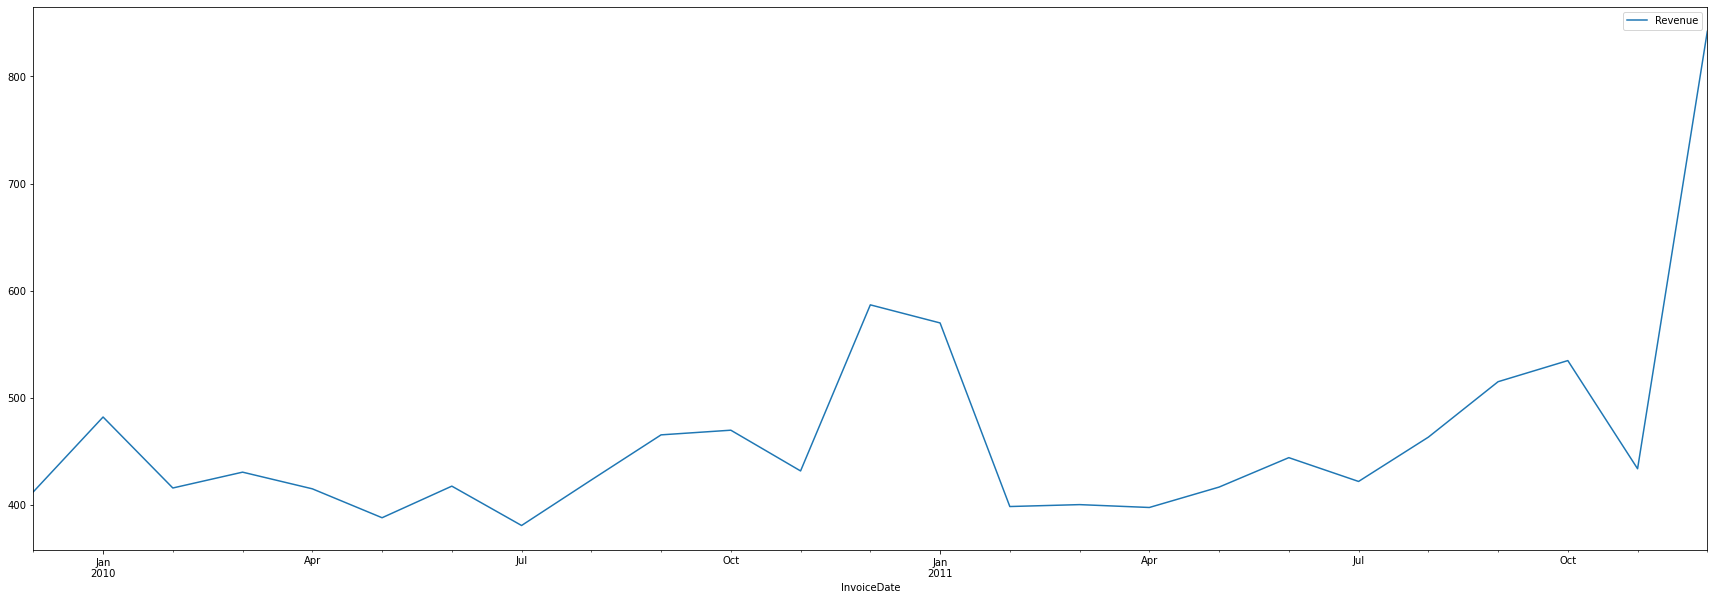

In [8]:
Sales.plot(figsize=(30,10))

In [9]:
Sales.describe()

,Revenue
count,25.000000
mean,462.164193
std,96.050293
min,380.667227
25%,414.906510
50%,430.468980
75%,469.648398
max,842.108252


In [10]:
### Testing For Stationarity

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
#ADF Test
test_result=adfuller(Sales['Revenue'])

In [13]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Revenue):
    result=adfuller(Revenue)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [14]:
adfuller_test(Sales['Revenue'])

ADF Test Statistic : -1.8982981746381213
p-value : 0.3328621261515562
#Lags Used : 0
Number of Observations Used : 24
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Differencing

In [15]:
Sales['Sales First Difference'] = Sales['Revenue'] - Sales['Revenue'].shift(1)

In [16]:
Sales['Revenue'].shift(1)

InvoiceDate
2009-12-01           NaN
2010-01-01    412.093018
2010-02-01    481.956346
2010-03-01    415.681133
2010-04-01    430.468980
2010-05-01    414.906510
2010-06-01    387.907291
2010-07-01    417.408890
2010-08-01    380.667227
2010-09-01    423.180409
2010-10-01    465.293619
2010-11-01    469.648398
2010-12-01    431.606422
2011-01-01    586.690142
2011-02-01    569.798884
2011-03-01    398.371236
2011-04-01    400.155147
2011-05-01    397.480893
2011-06-01    416.532338
2011-07-01    444.011324
2011-08-01    421.794839
2011-09-01    463.131731
2011-10-01    514.924097
2011-11-01    534.641157
2011-12-01    433.646531
Freq: MS, Name: Revenue, dtype: float64

<AxesSubplot:xlabel='InvoiceDate'>

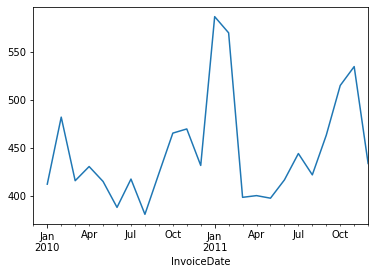

In [17]:
Sales['Revenue'].shift(1).plot()

In [18]:
## Again test dickey fuller test
adfuller_test(Sales['Sales First Difference'].dropna())

ADF Test Statistic : -4.7949211603744715
p-value : 5.561575727142922e-05
#Lags Used : 0
Number of Observations Used : 23
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [19]:
Sales['Seasonal First Difference']=Sales['Revenue']-Sales['Revenue'].shift(12)
Sales.head(24)

,Revenue,Sales First Difference,Seasonal First Difference
InvoiceDate,,,
2009-12-01,412.093018,NaN,NaN
2010-01-01,481.956346,69.863328,NaN
2010-02-01,415.681133,-66.275213,NaN
2010-03-01,430.468980,14.787847,NaN
2010-04-01,414.906510,-15.562470,NaN
2010-05-01,387.907291,-26.999219,NaN
2010-06-01,417.408890,29.501599,NaN
2010-07-01,380.667227,-36.741663,NaN
2010-08-01,423.180409,42.513182,NaN


In [20]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Revenue):
    result=adfuller(revenue)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("weak evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is non-stationary")
    else:
        print("strong evidence against null hypothesis, time series has a unit root, stationary ")

In [21]:
## Again test dickey fuller test
adfuller_test(Sales['Seasonal First Difference'].dropna())

ADF Test Statistic : -1.8982981746381213
p-value : 0.3328621261515562
#Lags Used : 0
Number of Observations Used : 24
strong evidence against null hypothesis, time series has a unit root, stationary 


### Auto Regression Model

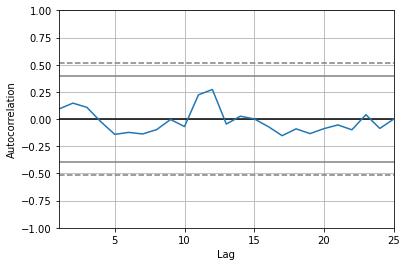

In [22]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(Sales['Revenue'])
plt.show()

### ARIMA

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

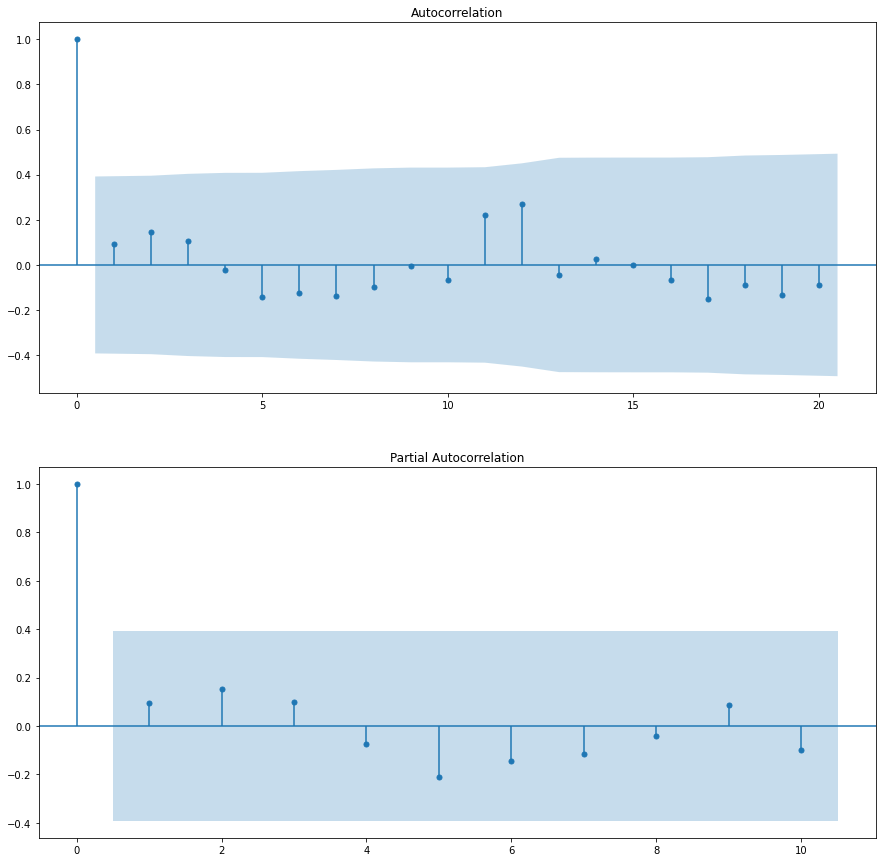

In [24]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Sales['Revenue'],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Sales['Revenue'],lags=10,ax=ax2)

In [25]:
# For non-seasonal data
#p=0, d=1, q=0 or 1  d=1
from statsmodels.tsa.arima_model import ARIMA

In [26]:
model=ARIMA(Sales['Revenue'],order=(0,1,0))
model_fit=model.fit()

C:\Users\santh\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [27]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.Revenue   No. Observations:                   24
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -144.933
Method:                           css   S.D. of innovations            101.487
Date:                Thu, 09 Jun 2022   AIC                            293.866
Time:                        14:32:08   BIC                            296.222
Sample:                    01-01-2010   HQIC                           294.491
                         - 12-01-2011                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.9173     20.716      0.865      0.387     -22.685      58.520


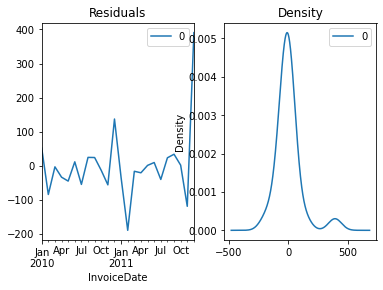

In [28]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

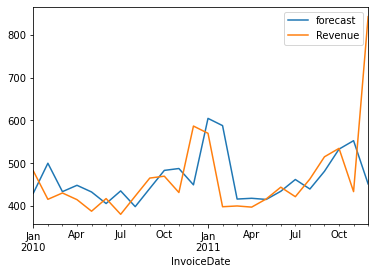

In [29]:
#Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

### Cross Validation

In [30]:
# Create Training and Test
train = Sales.Revenue[1:16]
test = Sales.Revenue[15:25]

In [31]:
# Build Model
# model = ARIMA(train, order=(0,1,0))  
model = ARIMA(train, order=(0, 1, 1))  
fitted = model.fit() 

C:\Users\santh\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [32]:
forecast=fitted.forecast(steps=10)[0]
forecast

array([425.36125173, 423.37693154, 421.39261135, 419.40829116,
       417.42397096, 415.43965077, 413.45533058, 411.47101039,
       409.4866902 , 407.50237001])

In [33]:
#Forecast
forecast, se, conf = fitted.forecast(10, alpha=0.05)  # 95% conf

In [34]:
# Make as pandas series
fc_series = pd.Series(forecast, test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)


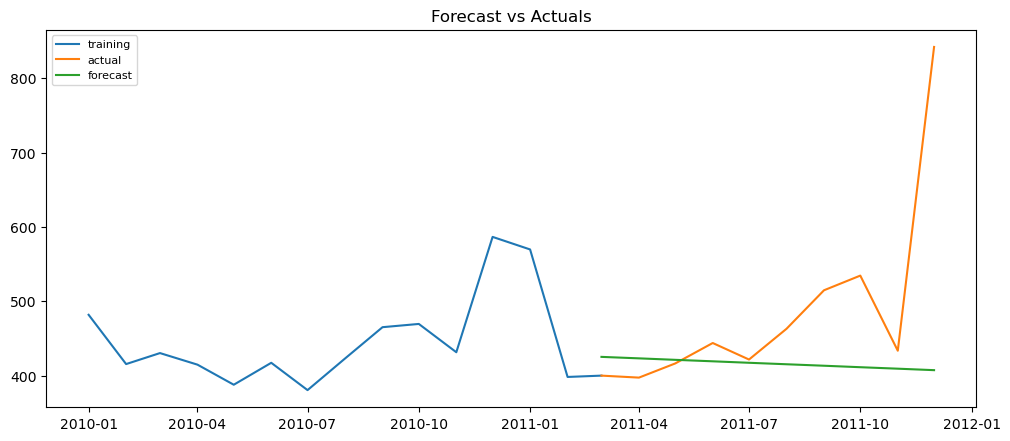

In [35]:
# Plot
plt.figure(figsize=(12,5), dpi=100)

plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')

plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### SARIMA

In [36]:
model=sm.tsa.statespace.SARIMAX(Sales['Revenue'],order=(0, 1, 0),seasonal_order=(0,1,0,12))
results=model.fit()

<AxesSubplot:xlabel='InvoiceDate'>

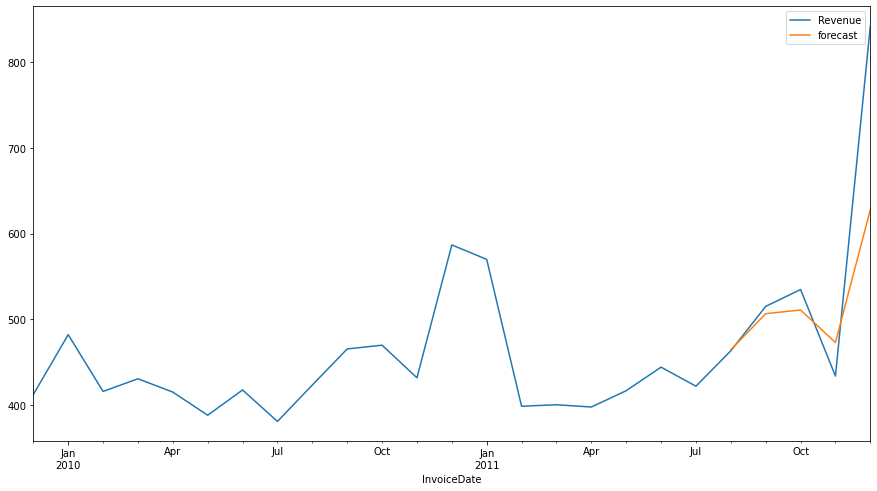

In [37]:
Sales['forecast']=results.predict(start=20,end=28,dynamic=True)
Sales[['Revenue','forecast']].plot(figsize=(15,8))

In [38]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            Revenue   No. Observations:                   25
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                 -70.546
Date:                            Thu, 09 Jun 2022   AIC                            143.093
Time:                                    14:32:13   BIC                            143.578
Sample:                                12-01-2009   HQIC                           142.913
                                     - 12-01-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7476.7618   1850.661      4.040      0.000    3849.533    1.11e+04
Ljung-Box (L1) (Q):                

In [39]:
from pandas.tseries.offsets import DateOffset
future_dates=[Sales.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [40]:
future_dateset_df=pd.DataFrame(index=future_dates[1:],columns=Sales.columns)

In [41]:
future_dateset_df.tail()

,Revenue,Sales First Difference,Seasonal First Difference,forecast
2013-07-01,NaN,NaN,NaN,NaN
2013-08-01,NaN,NaN,NaN,NaN
2013-09-01,NaN,NaN,NaN,NaN
2013-10-01,NaN,NaN,NaN,NaN
2013-11-01,NaN,NaN,NaN,NaN


In [42]:
future_df=pd.concat([Sales,future_dateset_df])

<AxesSubplot:>

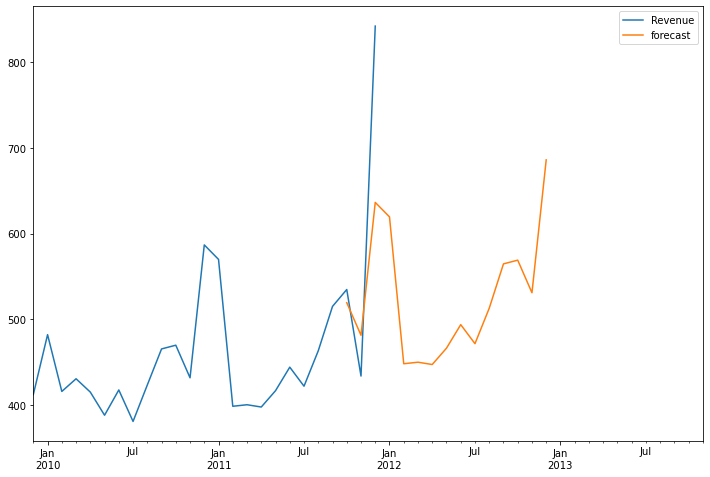

In [43]:
future_df['forecast'] = results.predict(start = 22, end = 36, dynamic= True) 
future_df[['Revenue', 'forecast']].plot(figsize=(12, 8))

In [44]:
future_df

,Revenue,Sales First Difference,Seasonal First Difference,forecast
2009-12-01,412.093018,NaN,NaN,NaN
2010-01-01,481.956346,69.863328,NaN,NaN
2010-02-01,415.681133,-66.275213,NaN,NaN
2010-03-01,430.468980,14.787847,NaN,NaN
2010-04-01,414.906510,-15.562470,NaN,NaN
2010-05-01,387.907291,-26.999219,NaN,NaN
2010-06-01,417.408890,29.501599,NaN,NaN
2010-07-01,380.667227,-36.741663,NaN,NaN
2010-08-01,423.180409,42.513182,NaN,NaN
2010-09-01,465.293619,42.113210,NaN,NaN
